# {code}`deepmax.mult_n` basis

In [1]:
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

from deepmax.cooker import P,R,Zcooker,Z_N,set_n
from deepmax.empirical import Ye
from deepmax.plot import grid,contours

In [2]:
# using mult basis
from deepmax.mult import wchiC
set_n(*wchiC)

N=26
Z0=Z_N(Ye,N,alpha=1.325)
Zc=Zcooker(Z0)
Hc=-Zc[-1].imag
Hc/2/np.pi

np.float64(0.14106354323233847)

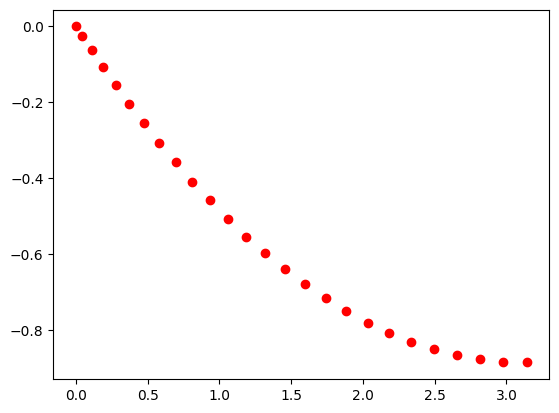

In [3]:
plt.plot(Zc.real,Zc.imag,'ro')

In [4]:
from scipy.interpolate import CubicSpline as CS

YCS=CS(Zc.real,Zc.imag)

In [5]:
YCS(np.pi)

array(-0.88632838)

In [6]:
Cc=wchiC[-1](Zc)

In [7]:
Cc

array([ 1.09228492e+00, -7.17158195e-02, -9.79169518e-03, -3.62257052e-03,
       -1.87648939e-03, -1.13493678e-03, -7.54226020e-04, -5.33796514e-04,
       -3.96909154e-04, -3.01606656e-04, -2.47728883e-04, -1.76728686e-04,
       -2.00139074e-04, -1.32912855e-05, -5.18578951e-04,  1.35118607e-03,
       -5.48211697e-03,  1.89514893e-02, -5.05728337e-02,  6.16515307e-02,
        1.42113222e-01, -8.46554152e-01,  1.85588370e+00, -2.20302909e+00,
        1.39045473e+00, -3.65768076e-01])

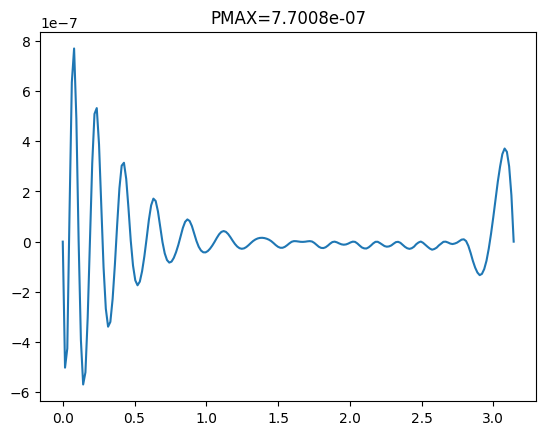

In [8]:
X200=np.linspace(0,np.pi,200)
plt.plot(X200,P(X200+1j*YCS(X200),Cc))
PMAX=max(abs(P(X200+1j*YCS(X200),Cc)))
plt.title(f'PMAX={PMAX:0.4e}')
plt.show()

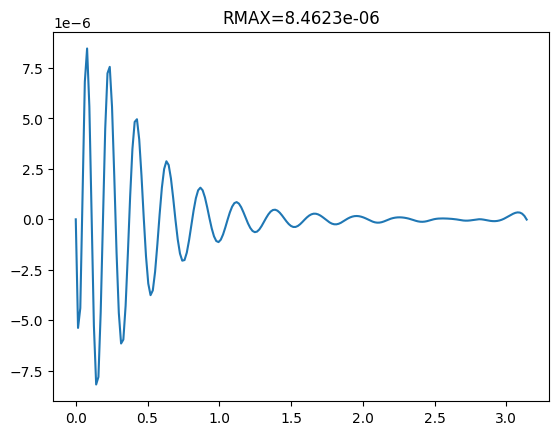

In [9]:
plt.plot(X200,R(X200+1j*YCS(X200),Cc))
RMAX=max(abs(R(X200+1j*YCS(X200),Cc)))
plt.title(f'RMAX={RMAX:0.4e}')
plt.show()

In [10]:
A=np.linspace(1.2,1.4)
ZA=[Zcooker(Z_N(Ye,N,alpha=a)) for a in A]

In [11]:
def PRMAX(Zc):
    X200=np.linspace(0,np.pi,200)
    YCS=CS(Zc.real,Zc.imag)
    Cc=wchiC[-1](Zc)
    PMAX=max(abs(P(X200+1j*YCS(X200),Cc)))
    RMAX=max(abs(R(X200+1j*YCS(X200),Cc)))
    return PMAX,RMAX

In [12]:
PRMA=np.array([PRMAX(Zc) for Zc in ZA]).T

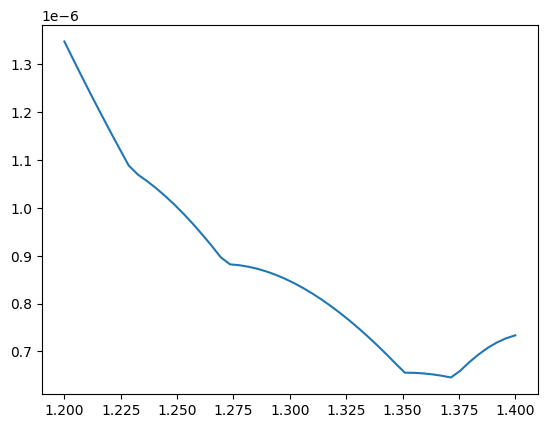

In [13]:
plt.plot(A,PRMA[0])

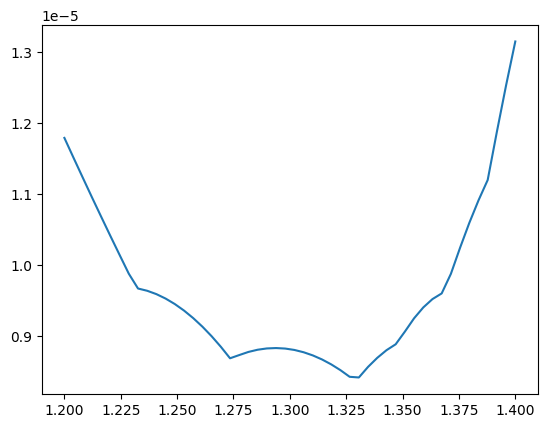

In [14]:
plt.plot(A,PRMA[1])

In [15]:
NN=np.arange(25,29)
ZA=[Zcooker(Z_N(Ye,N,alpha=1.325)) for N in NN]

In [16]:
PRMA=np.array([PRMAX(Zc) for Zc in ZA]).T

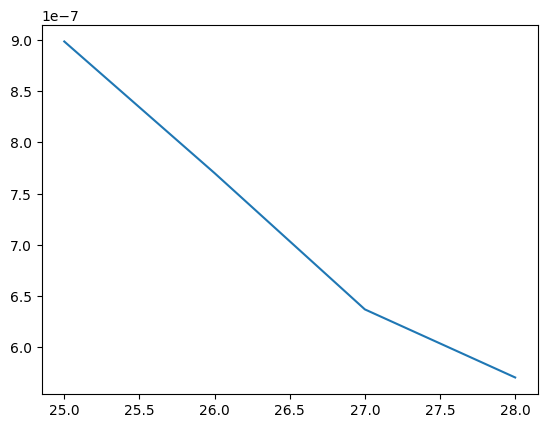

In [17]:
plt.plot(NN,PRMA[0])

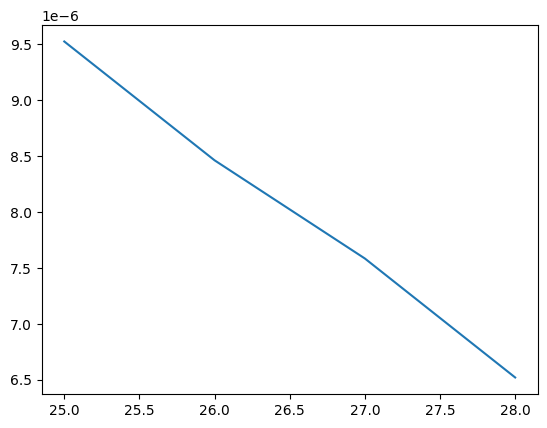

In [18]:
plt.plot(NN,PRMA[1])

In [19]:
ZA[-1][-1]/2/np.pi

np.complex128(0.5-0.14106353975214306j)